Code accompanying the manuscript: "Quantification of similarity and physical awareness of microstructures generated via Generative Models" by Sanket Thakre, Vir Karan, Anand Krishna Kanjarla.

The following code evaluates the ROM predictions (physical awareness of GAN microstructures) and latent space studies

## Imports

In [ ]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import variance 
from matplotlib.ticker import FuncFormatter, MaxNLocator
from google.colab import files
from sklearn.metrics import r2_score
import matplotlib.font_manager

Import auto-correlations data 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%%time
# Import the MATLAB generated correlations data file (256 x 256 RVE)
# Autocorrelations for phase-phase and phase-interface for 6 classes with 50 RVEs in each class
corr_final = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/corr_DP.csv', header = None)
a = corr_final.values

CPU times: user 2min 32s, sys: 8.93 s, total: 2min 41s
Wall time: 2min 41s


In [ ]:
anew = a
anew.shape

(300, 130050)

## Dimensionality reduction

We will use PCA for reducing dimensionality of the data and for generating ROM

In [ ]:
ID = 3
pca = PCA(n_components = ID).fit(anew)
anew_pca = pca.transform(anew)

var = np.cumsum(pca.explained_variance_ratio_)

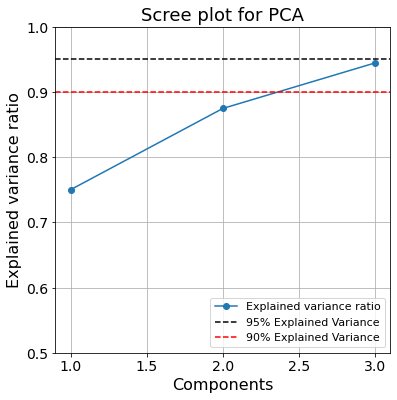

With the  3  components, we can retain 94.4357502084365 percent data


In [ ]:
# For value in range +1 to the no of components 
#%matplotlib 
#hfont = {'fontname':"Gabriola"}
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Arial']
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
plt.plot(range(1,ID+1),var,'-o',label='Explained variance ratio')

plt.title('Scree plot for PCA', fontsize = 18)
plt.ylabel('Explained variance ratio',  fontsize = 16)
plt.xlabel('Components',  fontsize = 16)
plt.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 0.90, color='r', linestyle='--', label = '90% Explained Variance')
plt.legend(loc='lower right', fontsize = 11)
plt.tick_params(axis='both', labelsize=14)
plt.ylim(0.5,1)
plt.grid(True)
#plt.savefig('/content/gdrive/My Drive/Work from home/scree_PCA_3D.png')
#ax.set_facecolor('white')
plt.show()

print('With the ',ID,' components, we can retain',sum(pca.explained_variance_ratio_)*100,'percent data')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Brush Script MT'] not found. Falling back to DejaVu Sans.


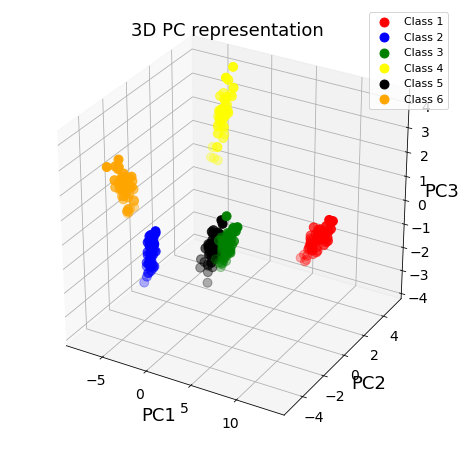

In [ ]:
all_stack_pca = anew_pca
hfont = {'fontname':'Sans'}
fig = plt.figure(figsize=plt.figaspect(1)*2)
plt.axis(aspect='equal')
ax = plt.axes(projection='3d')
zdata = all_stack_pca[0:50,2]
xdata = all_stack_pca[0:50,0]
ydata = all_stack_pca[0:50,1]
ax.scatter3D(xdata, ydata, zdata, c='red', s=80, marker='o', label='Class 1');
zdata = all_stack_pca[50:100,2]
xdata = all_stack_pca[50:100,0]
ydata = all_stack_pca[50:100,1]
ax.scatter3D(xdata, ydata, zdata, c='blue', s=80,marker='o',label='Class 2');
zdata = all_stack_pca[100:150,2]
xdata = all_stack_pca[100:150,0]
ydata = all_stack_pca[100:150,1]
ax.scatter3D(xdata, ydata, zdata, c='green', s=80, marker='o',label='Class 3');
zdata = all_stack_pca[150:200,2]
xdata = all_stack_pca[150:200,0]
ydata = all_stack_pca[150:200,1]
ax.scatter3D(xdata, ydata, zdata, c='yellow', s=80, marker='o',label='Class 4');
zdata = all_stack_pca[200:250,2]
xdata = all_stack_pca[200:250,0]
ydata = all_stack_pca[200:250,1]
ax.scatter3D(xdata, ydata, zdata, c='black', s=80, marker='o',label='Class 5');
zdata = all_stack_pca[250:300,2]
xdata = all_stack_pca[250:300,0]
ydata = all_stack_pca[250:300,1]
ax.scatter3D(xdata, ydata, zdata, c='orange', s=80, marker='o',label='Class 6');
plt.legend(fontsize = 11)

ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('PC1', fontname='Helvetica', fontsize = 18)
ax.set_ylabel('PC2', fontsize = 18)
ax.set_zlabel('PC3', fontsize = 18)
plt.title('3D PC representation ', fontname="Brush Script MT", fontsize = 18, )
#plt.savefig('/home/sanket/Sanket/Research/Comparison of unsupervised ML/PyPCA.png')
plt.show()

 ## Input data preparation

Input data (900 x 4): First three columns will be three times 300 x 3 PC components and 4th column will be work hardening coeffcients

In [ ]:
h1 = np.reshape(0.24 * np.ones(300),[300,1])
h2 = np.reshape(0.34 * np.ones(300),[300,1])
h3 = np.reshape(0.44 * np.ones(300),[300,1])
pc1 = np.hstack([anew_pca,h1])
pc2 = np.hstack([anew_pca,h2])
pc3 = np.hstack([anew_pca,h3])

inp_data = np.vstack([pc1,pc2,pc3])

In [ ]:
inp_data.shape

(900, 4)

## ROM Generation import

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mpe
from sklearn.metrics import r2_score as r2

In [ ]:
%%time
# Import the damage initiation stress data for all 900 RVEs (900 x 1)
dam_1 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Damage_0.24.csv', header = None)
dam_2 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Damage_0.34.csv', header = None)
dam_3 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Damage_0.44.csv', header = None)
y1 = dam_1.values
y2 = dam_2.values
y3 = dam_3.values

CPU times: user 23.3 ms, sys: 3.05 ms, total: 26.3 ms
Wall time: 1.87 s


In [ ]:
y = np.vstack([y1,y2,y3])
y.shape

(900, 1)

# Random forest model

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# To check which microstructure in taken in random split
h1 = np.reshape(1 * np.ones(50),[50,1])
h2 = np.reshape(2 * np.ones(50),[50,1])
h3 = np.reshape(3 * np.ones(50),[50,1])
h4 = np.reshape(4 * np.ones(50),[50,1])
h5 = np.reshape(5 * np.ones(50),[50,1])
h6 = np.reshape(6 * np.ones(50),[50,1])
cls = np.vstack([h1,h2,h3,h4,h5,h6])
index = np.vstack([cls,cls,cls])
inp_data1 = np.hstack([index,inp_data])

In [ ]:
# Data split  
x_train, x_test, y_train, y_test = train_test_split(inp_data1,y,test_size=0.2,random_state=1)
class_train = x_train[:,1:5]; class_test = x_test[:,1:5];  out_train= y_train; out_test = y_test; 

In [ ]:
# Code to check the split of data
ph1 = 0; ph2 = 0; ph3 = 0; ph4 = 0; ph5 = 0; ph6 = 0;
split_data = x_test # to check split in test or train data
for i in range(len(split_data)):
  if(split_data[i,0] == 1):
    ph1 = ph1 + 1
  elif(split_data[i,0] == 2):
    ph2 = ph2 + 1
  elif(split_data[i,0] == 3):
    ph3 = ph3 + 1
  elif(split_data[i,0] == 4):
    ph4 = ph4 + 1
  elif(split_data[i,0] == 5):
    ph5 = ph5 + 1
  elif(split_data[i,0] == 6):
    ph6 = ph6 + 1
cont = np.vstack([ph1,ph2,ph3,ph4,ph5,ph6])
cont

array([[32],
       [30],
       [29],
       [26],
       [31],
       [32]])

In [ ]:
# Code to check the split of data
ha1 = 0; ha2 = 0; ha3 = 0;
split_data = x_test # to check split in test or train data
for i in range(len(split_data)):
  if(split_data[i,4] == 0.24):
    ha1 = ha1 + 1
  elif(split_data[i,4] == 0.34):
    ha2 = ha2 + 1
  elif(split_data[i,4] == 0.44):
    ha3 = ha3 + 1
cont_ha = np.vstack([ha1,ha2,ha3])
cont_ha

array([[60],
       [55],
       [65]])

In [ ]:
# Model fitting
dt=ensemble.RandomForestRegressor(n_estimators=20,max_depth=7,random_state=1)
dt.fit(class_train,out_train)
dt.score(class_test,out_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9704940282888259

In [ ]:
dt.score(class_train,out_train)

0.9851901677190446

In [ ]:
# Cross validation
predicted = cross_val_predict(ensemble.RandomForestRegressor(n_estimators=20,max_depth=7,random_state=1), class_train,out_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed whe

In [ ]:
# Model testing on metrics
pred_class_test = dt.predict(class_test)
r2(out_test,pred_class_test)

0.9704940282888259

In [ ]:
mse(out_test,pred_class_test)

537.4702915701525

In [ ]:
mae(out_test,pred_class_test)

18.30262340625969

In [ ]:
mpe(out_test,pred_class_test)

0.018827821099555116

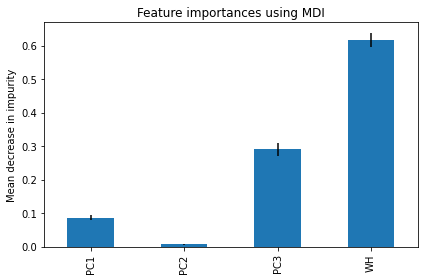

In [ ]:
importances = dt.feature_importances_

forest_importances = pd.Series(importances, index=['PC1', 'PC2', 'PC3', 'WH'])
std = np.std([tree.feature_importances_ for tree in dt.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances

PC1    0.086083
PC2    0.006354
PC3    0.290469
WH     0.617093
dtype: float64

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(50, 50))
#fig = plt.figure
plot_tree(dt.estimators_[4], feature_names= ['PC1', 'PC2', 'PC3', 'WH'])


# Actual & GAN microstructure comparison


In [ ]:
%%time
# Import the damage initiation stress data for all 900 RVEs (900 x 1)
dam_m = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/corr_m.csv', header = None)
dam_g = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/corr_g.csv', header = None)
ind_1 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Index_max_0.24.csv', header = None)
ind_2 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Index_max_0.34.csv', header = None)
ind_3 = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/Index_max_0.44.csv', header = None)

dam_g_lat = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Damage prediction/corr_g_lat.csv', header = None)

x1 = dam_m.values
x2 = dam_g.values
x3 = dam_g_lat.values
y_all = np.vstack([ind_1.values,ind_2.values,ind_3.values])


CPU times: user 1min 14s, sys: 4.23 s, total: 1min 18s
Wall time: 1min 22s


In [ ]:
y_all[:,1]

array([ 864.52,  764.13,  855.93, 1035.  ,  868.85, 1009.9 ,  976.98,
        888.28,  984.36, 1154.8 , 1012.5 , 1129.  , 1109.1 , 1060.7 ,
       1125.4 , 1258.6 , 1153.1 , 1249.  ])

In [ ]:
# Performing PCA on all at once
ID = 3
pca_m = PCA(n_components = ID).fit(x1)
anew_pca_m = pca_m.transform(x1)
pca_g = PCA(n_components = ID).fit(x2)
anew_pca_g = pca_g.transform(x2)

In [ ]:
print('With the ',ID,' components, we can retain',sum(pca_g.explained_variance_ratio_)*100,'percent data')

With the  3  components, we can retain 97.39645173459496 percent data


In [ ]:
print('With the ',ID,' components, we can retain',sum(pca_m.explained_variance_ratio_)*100,'percent data')

With the  3  components, we can retain 97.08820122768715 percent data


In [ ]:
term1 = np.vstack([anew_pca_m[0,:],anew_pca_m[6,:],anew_pca_m[12,:]])
term2 = np.vstack([anew_pca_m[1,:],anew_pca_m[7,:],anew_pca_m[13,:]])
term3 = np.vstack([anew_pca_m[2,:],anew_pca_m[8,:],anew_pca_m[14,:]])
term4 = np.vstack([anew_pca_m[3,:],anew_pca_m[9,:],anew_pca_m[15,:]])
term5 = np.vstack([anew_pca_m[4,:],anew_pca_m[10,:],anew_pca_m[16,:]])
term6 = np.vstack([anew_pca_m[5,:],anew_pca_m[11,:],anew_pca_m[17,:]])
class_wise_m = np.vstack([term1,term2,term3,term4,term5,term6,])
class_wise_m

array([[13.23359234,  0.04405784,  0.51349063],
       [13.23359234,  0.04405784,  0.51349063],
       [12.04579557, -0.0911476 ,  0.27367716],
       [-6.95662387, -0.07696448, -2.56937016],
       [-6.45656961,  0.03831879, -2.43143942],
       [-6.95662387, -0.07696448, -2.56937016],
       [ 2.04190637, -0.0572957 , -1.24219351],
       [ 1.66329928,  0.22010624, -1.03663657],
       [ 1.72441942, -0.19539373, -1.41035169],
       [-4.03589989,  4.85342336,  2.51678753],
       [-4.03589989,  4.85342336,  2.51678753],
       [-4.12893479,  4.19253077,  1.8985806 ],
       [-0.22451497, -0.26840618, -1.69526375],
       [ 0.28304141, -0.03177191, -1.42654382],
       [ 1.11587297, -0.13612172, -1.39542624],
       [-3.55161686, -4.34422946,  2.11932038],
       [-4.65265418, -4.55872281,  2.66119456],
       [-4.34218175, -4.40890016,  2.76326632]])

In [ ]:
term1 = np.vstack([anew_pca_g[0,:],anew_pca_g[6,:],anew_pca_g[12,:]])
term2 = np.vstack([anew_pca_g[1,:],anew_pca_g[7,:],anew_pca_g[13,:]])
term3 = np.vstack([anew_pca_g[2,:],anew_pca_g[8,:],anew_pca_g[14,:]])
term4 = np.vstack([anew_pca_g[3,:],anew_pca_g[9,:],anew_pca_g[15,:]])
term5 = np.vstack([anew_pca_g[4,:],anew_pca_g[10,:],anew_pca_g[16,:]])
term6 = np.vstack([anew_pca_g[5,:],anew_pca_g[11,:],anew_pca_g[17,:]])
class_wise_g = np.vstack([term1,term2,term3,term4,term5,term6,])
class_wise_g

array([[16.08946696,  0.25389843,  1.05087877],
       [16.08946696,  0.25389843,  1.05087877],
       [14.88182636,  0.81216419,  1.26505841],
       [-6.28251581, -1.87277366, -2.70060283],
       [-6.3177244 , -1.58380104, -2.52106525],
       [-6.28251581, -1.87277366, -2.70060283],
       [ 0.11484649, -1.35876436, -1.66347875],
       [ 0.37925091, -4.91010654, -3.91727024],
       [ 0.59215009, -2.3647426 , -2.29210382],
       [-5.24098685,  5.94441159, -1.39304992],
       [-5.24098685,  5.94441159, -1.39304992],
       [-5.23540345,  6.80602671, -0.78701908],
       [ 2.70930028,  2.30969091,  1.3192523 ],
       [ 2.0429166 , -3.03668258, -2.32457376],
       [ 3.15060892,  0.6538371 ,  0.32194951],
       [-6.4858279 , -0.40950491,  6.23597815],
       [-8.18911887, -3.58182033,  4.8059987 ],
       [-6.77475365, -1.98736927,  5.64282178]])

# GAN microstructure prediction using ROM

In [ ]:
# Input data generation
h_1 = np.reshape(0.24 * np.ones(6),[6,1])
h_2 = np.reshape(0.34 * np.ones(6),[6,1])
h_3 = np.reshape(0.44 * np.ones(6),[6,1])
inp_h = np.vstack([h_1,h_2,h_3])

In [ ]:
inp_g = np.hstack([anew_pca_g,inp_h])
inp_m = np.hstack([anew_pca_m,inp_h])

In [ ]:
# Predicting using random forest model
pred_g = dt.predict(inp_g)
print("Rsquare (class test): %f" %(dt.score(inp_g, y_all[:,1])))


Rsquare (class test): 0.499097


In [ ]:
# Predicting using random forest model
pred_m = dt.predict(inp_m)
print("Rsquare (class test): %f" %(dt.score(inp_m, y_all[:,1])))

Rsquare (class test): 0.833278


In [ ]:
pred_m

array([ 827.83464971,  724.94318739,  822.38414063,  970.91005219,
        806.58089804,  932.64319161,  940.4255635 ,  852.75412727,
        935.68377581, 1092.55605797,  948.87732175, 1077.34701856,
       1089.83400971,  987.89497844, 1081.52439212, 1181.20267575,
       1090.92957201, 1176.76835516])

In [ ]:
pred_g

array([ 853.30636592,  728.3643739 ,  805.86961127,  798.04667727,
        939.55665293,  974.12496327,  945.45905651,  853.09304137,
        934.22627715,  946.30009975,  928.9244053 , 1122.56475198,
       1111.25330206,  995.56260623, 1084.33882031, 1071.27639123,
       1076.84083888, 1229.20406264])

In [ ]:
y_all[:,1]

array([ 864.52,  764.13,  855.93, 1035.  ,  868.85, 1009.9 ,  976.98,
        888.28,  984.36, 1154.8 , 1012.5 , 1129.  , 1109.1 , 1060.7 ,
       1125.4 , 1258.6 , 1153.1 , 1249.  ])

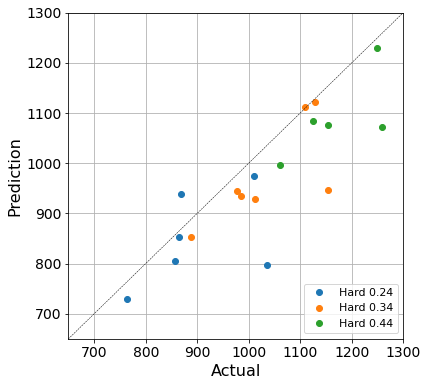

In [ ]:
# Hardening coefficients wise plot
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
plt.plot(y_all[0:6,1],pred_g[0:6],'o',label='Hard 0.24')
plt.plot(y_all[6:13,1],pred_g[6:13],'o',label='Hard 0.34')
plt.plot(y_all[13:18,1],pred_g[13:18],'o',label='Hard 0.44')

#plt.title('QQ plot', fontsize = 18)
plt.ylabel('Prediction', fontsize = 16)
plt.xlabel('Actual', fontsize = 16)
#plt.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')

plt.plot([0,1300],[0,1300],color='k', linestyle='--',linewidth=0.5)
plt.legend(loc='lower right', fontsize = 11)
plt.tick_params(axis='both', labelsize=14)
plt.ylim(650,1300)
plt.xlim(650,1300)
plt.grid(True)
#plt.savefig('/content/gdrive/My Drive/Work from home/QQ.png')
#ax.set_facecolor('white')
plt.show()

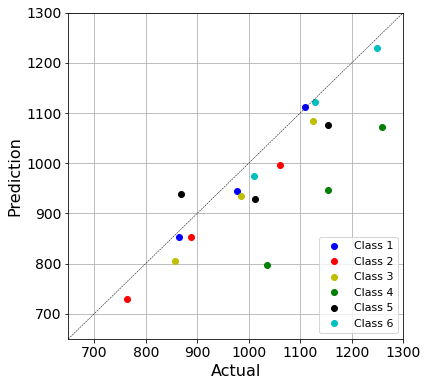

In [ ]:
# Class wise plot
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
plt.plot(y_all[0,1],pred_g[0],'ob',label='Class 1')
plt.plot(y_all[6,1],pred_g[6],'ob')
plt.plot(y_all[12,1],pred_g[12],'ob')
plt.plot(y_all[1,1],pred_g[1],'or',label='Class 2')
plt.plot(y_all[7,1],pred_g[7],'or')
plt.plot(y_all[13,1],pred_g[13],'or')
plt.plot(y_all[2,1],pred_g[2],'oy',label='Class 3')
plt.plot(y_all[8,1],pred_g[8],'oy')
plt.plot(y_all[14,1],pred_g[14],'oy')
plt.plot(y_all[3,1],pred_g[3],'og',label='Class 4')
plt.plot(y_all[9,1],pred_g[9],'og')
plt.plot(y_all[15,1],pred_g[15],'og')
plt.plot(y_all[4,1],pred_g[4],'ok',label='Class 5')
plt.plot(y_all[10,1],pred_g[10],'ok')
plt.plot(y_all[16,1],pred_g[16],'ok')
plt.plot(y_all[5,1],pred_g[5],'oc',label='Class 6')
plt.plot(y_all[11,1],pred_g[11],'oc')
plt.plot(y_all[17,1],pred_g[17],'oc')

plt.plot([0,1300],[0,1300],color='k', linestyle='--',linewidth=0.5)
#plt.title('QQ plot', fontsize = 18)
plt.ylabel('Prediction', fontsize = 16)
plt.xlabel('Actual', fontsize = 16)
#plt.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')

plt.legend(loc='lower right', fontsize = 11)
plt.tick_params(axis='both', labelsize=14)
plt.ylim(650,1300)
plt.xlim(650,1300)
plt.grid(True)
#plt.savefig('/content/gdrive/My Drive/Work from home/QQ.png')
#ax.set_facecolor('white')
plt.show()

In [ ]:
r = np.empty(6)
for i in range (6):
  m_pre = np.vstack([pred_m[i],pred_m[i+6],pred_m[i+12]])
  g_pre = np.vstack([pred_g[i],pred_g[i+6],pred_g[i+12]])
  r[i] = r2_score(m_pre, g_pre)
r
#m_pre = np.vstack([pred_m[0],pred_m[6],pred_m[12]])
#g_pre = np.vstack([pred_g[0],pred_g[6],pred_g[12]])
#r = r2_score(m_pre, g_pre)
#print(r)

array([ 0.96720683,  0.99795806,  0.99162231, -1.84198522,  0.54784871,
        0.78384805])

In [ ]:
mse_v = np.empty(6)
for i in range (6):
  m_pre = np.vstack([pred_m[i],pred_m[i+6],pred_m[i+12]])
  g_pre = np.vstack([pred_g[i],pred_g[i+6],pred_g[i+12]])
  mse_v[i] = mse(m_pre, g_pre)
mse_v
#mse(pred_m,pred_g)

array([  377.64348781,    23.53729861,    94.25832945, 21118.77991188,
        6093.05422224,  2171.62807153])

In [ ]:
mae_v = np.empty(6)
for i in range (6):
  m_pre = np.vstack([pred_m[i],pred_m[i+6],pred_m[i+12]])
  g_pre = np.vstack([pred_g[i],pred_g[i+6],pred_g[i+12]])
  mae_v[i] = mae(m_pre, g_pre)
mae_v
#mae(pred_m,pred_g)

array([ 17.30816719,   3.8092428 ,   6.92881874, 143.01520589,
        55.67246816,  46.37840419])

In [ ]:
mpe_v = np.empty(6)
for i in range (6):
  m_pre = np.vstack([pred_m[i],pred_m[i+6],pred_m[i+12]])
  g_pre = np.vstack([pred_g[i],pred_g[i+6],pred_g[i+12]])
  mpe_v[i] = mpe(m_pre, g_pre)
mpe_v
#mpe(pred_m,pred_g)

array([0.01859172, 0.00429275, 0.00808042, 0.1349905 , 0.06626862,
       0.04366936])

# Latent space studies

In [ ]:
%%time
space = np.zeros(512)
lay = 1

# For all samples (100 each for 6 classes)
for i in range(600):
  data = pd.read_csv('/content/gdrive/My Drive/Work from home/Vir files/Visualisation/sampled_latents/'+ str(i) +'.csv')
  lat = data.values
  dum = lat[:,lay]
  space = np.vstack([space,dum])

obs_lay = space[1:601,:]

CPU times: user 2.24 s, sys: 111 ms, total: 2.35 s
Wall time: 2.95 s


In [ ]:
obs_lay.shape

(300, 512)

In [ ]:
ID = 3
pca = PCA(n_components = ID).fit(obs_lay)
anew_pca = pca.transform(obs_lay)

In [ ]:
pca.explained_variance_ratio_

array([0.38894122, 0.27803877, 0.00334084])

In [ ]:
print('With the ',ID,' components, we can retain',sum(pca.explained_variance_ratio_)*100,'percent data')

With the  3  components, we can retain 67.03208278642097 percent data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


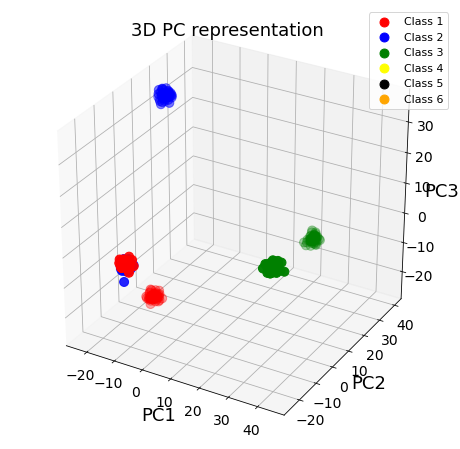

In [ ]:
all_stack_pca = anew_pca

fig = plt.figure(figsize=plt.figaspect(1)*2)
plt.axis(aspect='equal')
ax = plt.axes(projection='3d')
zdata = all_stack_pca[0:100,2]
xdata = all_stack_pca[0:100,0]
ydata = all_stack_pca[0:100,1]
ax.scatter3D(xdata, ydata, zdata, c='red', s=80, marker='o', label='Class 1');
zdata = all_stack_pca[100:200,2]
xdata = all_stack_pca[100:200,0]
ydata = all_stack_pca[100:200,1]
ax.scatter3D(xdata, ydata, zdata, c='blue', s=80,marker='o',label='Class 2');
zdata = all_stack_pca[200:300,2]
xdata = all_stack_pca[200:300,0]
ydata = all_stack_pca[200:300,1]
ax.scatter3D(xdata, ydata, zdata, c='green', s=80, marker='o',label='Class 3');
zdata = all_stack_pca[300:400,2]
xdata = all_stack_pca[300:400,0]
ydata = all_stack_pca[300:400,1]
ax.scatter3D(xdata, ydata, zdata, c='yellow', s=80, marker='o',label='Class 4');
zdata = all_stack_pca[400:500,2]
xdata = all_stack_pca[400:500,0]
ydata = all_stack_pca[400:500,1]
ax.scatter3D(xdata, ydata, zdata, c='black', s=80, marker='o',label='Class 5');
zdata = all_stack_pca[500:600,2]
xdata = all_stack_pca[500:600,0]
ydata = all_stack_pca[500:600,1]
ax.scatter3D(xdata, ydata, zdata, c='orange', s=80, marker='o',label='Class 6');
plt.legend(fontsize = 11)

ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('PC1', fontsize = 18)
ax.set_ylabel('PC2', fontsize = 18)
ax.set_zlabel('PC3', fontsize = 18)
plt.title('3D PC representation ', fontsize = 18, )
#plt.savefig('/home/sanket/Sanket/Research/Comparison of unsupervised ML/PyPCA.png')
plt.show()